# Processamento de linguagem natural e modelo de análise de sentimento.

## Instalação

Nessa parte do notebook realiza-se a instalação das bibliotecas que serão utilizadas no decorrer do código, bem como a importação da base de dados que baseia todas as posteriores análises. 

### Importação das bibliotecas

In [ ]:
# instalação de pacotes para remoção de acentos
!pip install unidecode
# Instalando biblioteca Python "emoji"
!pip install emoji
# Instalação de biblioteca para remoção de stop words
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importação das bibliotecas:
import pandas as pd
# bibliotecas utilizadas para tokenização
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# bibliotecas utilizadas para remoção de stop words
import nltk
nltk.download('punkt')
# bibliotecas para remoção de acentos
from unidecode import unidecode
import numpy as np
#biblioteca para tokenização 
from keras.preprocessing.text import Tokenizer
# bibliotecas utilizadas para o tratamento de abreviações
import re
# Instalando biblioteca Python "emoji"
import emoji
#importação das bibliotecas para remoção de Stop Words
import spacy
nlp = spacy.cli.download('pt_core_news_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


### Criação da tabela 

In [ ]:
#Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importação da base de dados:
df = pd.read_excel('/content/drive/MyDrive/Modulo_6_grupo_1/Base_Inicial.xlsx')
df

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._ 💙,Cn4bcg7LM4t,reply,REELS,18340331500020596,18014457793513467,https://www.instagram.com/p/Cn4bcg7LM4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,Agradecemos o seu feedback! 💙,CnzSr6ltH74,reply,REELS,18004216693521888,17957000375356996,https://www.instagram.com/p/CnzSr6ltH74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


In [ ]:
#remoção de todas as linhas que não possuem a coluna texto:
df = df.dropna(subset=['texto'])
df

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._ 💙,Cn4bcg7LM4t,reply,REELS,18340331500020596,18014457793513467,https://www.instagram.com/p/Cn4bcg7LM4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,Agradecemos o seu feedback! 💙,CnzSr6ltH74,reply,REELS,18004216693521888,17957000375356996,https://www.instagram.com/p/CnzSr6ltH74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


## Análise descritiva

### Colunas


1. **Coluna Id:** A coluna id apresenta o index para visualização da planilha e pode ser usada como chave primária do comentário. No que diz respeito à utilização no modelo, essa coluna não confere relevância para a sua construção, visto que sua utilidade está atrelada apenas ao fato de garantir que cada linha possua um identificador único. Portanto, *essa coluna não será utilizada.*

2. **Coluna dataPublicada:** A coluna data publicada refere-se a data de publicação do comentário. Para a construção do modelo **bag of words**, essa coluna não apresenta relevância, portanto, *não será utilizada*. Posteriormente, sua utilização pode se fazer necessária para a averiguação dos períodos das campanhas.

3. **Coluna autor:** A coluna autor é referente à conta do instagram que realizou o comentário na postagem. Essa coluna não será utilizada diretamente pelo modelo bag of words, mas será importante para o agrupamento de comentários referente à empresa BTG. 

4. **Coluna texto:** A coluna texto se refere ao texto presente no comentário realizado. Para a construção do modelo, essa é a coluna com maior relevância, visto que são justamente os conteúdos dos comentários que precisam ser analisados pelo modelo. 

5. **Coluna sentimento:** A coluna sentimento é, justamente, o target da classificação que precisamos fazer dos dados. Essa coluna será utilizada para o treinamento posterior do modelo, visto que apresenta o resultado esperado. Contudo, diante de uma análise manual das classificações, foi possível perceber que alguns comentários foram classificados de maneira errônea, dado que possuem um teor positivo mas foram classificados como negativos ou neutros.

6. **Coluna tipoInteracao:** A coluna tipo interação informa o tipo de interação a qual aquele comentário pertence, como, por exemplo, uma resposta ou como marcação. Essa coluna, inicialmente, não será utilizada para a construção do modelo bag of words.

7. **Coluna anomalia:**  Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

8. **Coluna probabilidadeAnomalia:**  Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

9. **Coluna linkPost:** Essa coluna possui o link referente a postagem da qual foram retirados os comentários. Todos os comentários referentes à mesma postagem possuem o link igual. Pensando na análise de sentimento, essa coluna não apresenta relevância, portanto, não será utilizada. 

10. **Coluna processado:** Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

11. **Coluna contemHyperlink:** Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.



### Funções

## Pré processamento dos dados

O pré processamento dos dados é uma técnica que consiste em uma série de etapas que buscam preparar os dados para uma análise posterior, eliminando informações desnecessárias, corrigindo erros e padronizando o formato dos dados. 
Essa é uma etapa muito importante porque, muitas vezes, dados textuais são frequentemente não estruturados, o que significa que não seguem 

### Remoção de acentos

Para garantir que um texto seja processado de forma consistente, é importante realizar a normalização dos seus componentes. Nesse sentido, a remoção de acentos é uma etapa fundamental, já que isso ajuda o algoritmo a compreender com mais precisão o que o texto está dizendo. Além disso, a ausência de acentos reduz o risco de que o algoritmo interprete de maneira diferente duas palavras idênticas, mas que tenham sido acentuadas de formas distintas ou incorretas. Em resumo, a remoção de acentos é uma prática essencial no pré-processamento de textos para aprimorar a qualidade e a eficácia da análise de dados em linguagem natural.

In [ ]:
#Código para remoção dos acentos
def remocaoAcentos(dataframe):
    dataframe = dataframe.applymap(lambda x: unidecode(str(x)))
    return dataframe

Teste isolado

In [ ]:
# Teste isolado da função remoção de acentos
remocaoAcentos(df)

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Ola, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Ola, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,,"Oi, Nelson! Tudo bem?\n\nPossuimos solucoes co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"Estao contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._,Cn4bcg7LM4t,reply,REELS,18340331500020596,18014457793513467,https://www.instagram.com/p/Cn4bcg7LM4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,Agradecemos o seu feedback!,CnzSr6ltH74,reply,REELS,18004216693521888,17957000375356996,https://www.instagram.com/p/CnzSr6ltH74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


### Remoção letras maiusculas

O tratamento de letras maiúsculas é importante porque, muitas vezes, a diferença entre letras maísuculas e minúsculas pode impactar negativamente a análise do algoritmo, tendo em vista que ele pode interpretar as palavras como diferentes em determinadas situações. Esse problema pode levar a resultados imprecisos, tendo em vista que, diante do objetivo de contar a frequência de palavras, essas diferenças garantem que as palavras sejam contadas de maneira distinta. 

In [ ]:
def tratamentoMaiusculas(dataframe):
    # Pré-processamento das letras maiúsculas
    dataframe = dataframe.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    # Exibição dos dados pré-processados
    return dataframe

Teste isolado

In [ ]:
#teste isolado da função tratamento Maiúsculas
tratamentoMaiusculas(df)

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"olá, ana paula! como vai?\n\nsentimos muito pe...",ckg9kxjpy2b,reply,reels,17949834317264462,17988010663613927,https://www.instagram.com/p/ckg9kxjpy2b/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"olá, rosana! tudo bem?\n\npara te orientarmos ...",ckg9kxjpy2b,reply,reels,17968362370910874,17955765434145877,https://www.instagram.com/p/ckg9kxjpy2b/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,ckg9kxjpy2b,reply,reels,17968676113804345,17868806699792839,https://www.instagram.com/p/ckg9kxjpy2b/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar boa tarde! tudo bem?\n\nlamentamo...,ckg9kxjpy2b,reply,reels,18045922528372377,18327741553009776,https://www.instagram.com/p/ckg9kxjpy2b/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,,"oi, nelson! tudo bem?\n\npossuímos soluções co...",ckg9kxjpy2b,reply,reels,17864851241797946,18159475801266342,https://www.instagram.com/p/ckg9kxjpy2b/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"estão contratando muitos blogueiros, mas eu fi...",cn4bcg7lm4t,comment,reels,17965800242039792,-,https://www.instagram.com/p/cn4bcg7lm4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._ 💙,cn4bcg7lm4t,reply,reels,18340331500020596,18014457793513467,https://www.instagram.com/p/cn4bcg7lm4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,agradecemos o seu feedback! 💙,cnzsr6lth74,reply,reels,18004216693521888,17957000375356996,https://www.instagram.com/p/cnzsr6lth74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,arrasa micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,cn4bcg7lm4t,comment,reels,17969884580114389,-,https://www.instagram.com/p/cn4bcg7lm4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


### Tratamento de emojis

Emojis são muito utilizados por usuários de redes sociais, ajudando-os, assim, a expressar emoções e sentimentos. Portanto, para melhor entender o sentido de uma mensagem, o tratamento de emojis podem fornecer uma melhor precisão para a análise e uma classificação mais precisa dos sentimentos de uma mensagem.

In [ ]:
# Função para converter emojis em texto.
# A função recebe dois argumentos. O dataframe e a coluna a ser tratada, e retorna o dataframe.
def conversaoEmojis(coluna):
    coluna = coluna.apply(emoji.demojize)
    return coluna

Teste isolado

In [ ]:
# Teste isolado da função converter emoji em texto
conversaoEmojis(df['texto'])

### Tratamento de abreviações e pontuações

O tratamento de abreviações é importante porque garante que o algoritmo de processamento de linguagem natural interprete corretamente o significado do texto. Ao substituir abreviações por suas formas completas, o texto se torna mais legível e compreensível para o algoritmo que realizará o processamento.

In [ ]:
   
def tratamentoAbreviacoes(coluna):    
    coluna = coluna.astype(str)
    coluna.str.lower()
# Dicionário com as abreviações e suas expansões
    abreviacoes = {
        r'\bvc\b': 'você',
        r'\btbm\b': 'também',
        r'\bpq\b': 'porque',
        r'\bmt\b': 'muito',
        r'\bmto\b':'muito',
        r'\bblz\b': 'beleza',
        r'\bjah\b': 'já',
        r'\bbj\b': 'beijo',
        r'\bflw\b': 'falou',
        r'\bvlw\b': 'valeu',
        r'\bkrl\b': 'caralho',
        r'\bqnd\b': 'quando',
        r'\bfds\b': 'fim de semana',
        r'\bqq\b': 'qualquer',
        r'\bmsg\b': 'mensagem',
        r'\bpra\b': 'para',
        r'\bp\b': 'para',
        r'\bpqp\b': 'puta que pariu',
        r'\bvlh\b': 'velho',
        r'\bnss\b': 'nossa',
        r'\bngm\b': 'ninguém',
        r'\bqm\b': 'quem',
        r'\bobs\b': 'observação',
        r'\bqt\b': 'quanto',
        r'\btbm ñ\b': 'também não',
        r'\bpf\b': 'por favor',
        r'\bpdc\b': 'pode crer',
        r'\btalkei\b': 'ok',
        r'\bd+\b': 'demais',
        r'\bdms\b': 'demais',
        r'\bsqn\b': 'só que não',
        r'\bmsm\b': 'mesmo',
        r'\bn/ao\b': 'não',
        r'\bn/\b': 'não',
        r'\bblz\b': 'beleza',
        r'\bq\b': 'que',
        r'\btd\b': 'tudo',
        r'\bpfvr\b': 'por favor',
        r'\bgnt\b': 'gente',
        r'\bto\b': 'estou',
        r'\bvcs\b': 'vocês',
        r'\bn/oa\b': 'não',
        r'\bsla\b': 'sei lá',
        r'\bflws\b': 'falou',
        r'\bbjos\b': 'beijos',
        r'\bkd\b': 'cadê',
        r'\blgl\b': 'legal',
        r'\bnum\b': 'número',
        r'\bjá q\b': 'já que',
        r'\bmano\b': 'irmão',
        r'\bpke\b': 'porque',
        r'\bpr\b': 'para',
        r'\btpm\b': 'tensão pré-menstrual',
        r'\btá\b': 'está',
        r'\bqmto\b': 'muito',
        r'\bñ\b': 'não',
        r'\bvamu\b': 'vamos',
        r'\btmj\b': 'estamos juntos',
        r'[0-9]': '',
        r'@\w+': '',
        r'[^\w\s]': '',
        r'\bwww\.[^\s]*': '',
        r'\bola\b': '',
        r'\n': ''
    }

    # Aplica a substituição de cada abreviação no dataframe
    for abreviacao, expansao in abreviacoes.items():
        coluna= coluna.apply(lambda x: re.sub(abreviacao, expansao, x, flags=re.IGNORECASE))
    
    return coluna

Teste isolado:

In [ ]:
#teste isolado
tratamentoAbreviacoes(df['texto'])

0       Olá Ana Paula Como vaiSentimos muito pelo ocor...
1       Olá Rosana Tudo bemPara te orientarmos com mai...
2                                                        
3        Boa tarde Tudo bemLamentamos o ocorrido tivem...
4       Oi Nelson Tudo bemPossuímos soluções completas...
                              ...                        
4544    Estão contratando muitos blogueiros mas eu fic...
4545                                                   _ 
4546                          Agradecemos o seu feedback 
4547                                       Arrasa Micaaa 
4548                                          Excelência 
Name: texto, Length: 4449, dtype: object

### Tokenização

A tokenização é um processo de pré-processamento utilizado para dividir os valores de uma coluna em pedaços menores, como palavras ou frases. Cada pedaço, conhecido como token, recebe um valor específico para identificação. Esse processo torna o texto mais gerenciável e facilita a análise e os processamentos subsequentes dos dados.

Tokenização por palavra

In [ ]:
#definição de função para tokenização
def tokenizacaoPalavra(comentarios):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(comentarios)
  print(f'Vocabulario: {list(tokenizer.word_index.keys())}')
  return tokenizer

Tokenização por frase

In [ ]:
def tokenizacaoFrase(coluna):
  comentarios = coluna.values
  tokenFrase = []
  for comentarios in comentarios:
    tokenFrase.append(sent_tokenize(comentarios))
  return tokenFrase

Testes isolados

In [ ]:
tokenizacaoFrase(df['texto'])

[['Olá, Ana Paula!',
  'Como vai?',
  'Sentimos muito pelo ocorrrido.',
  'Te enviamos uma mensagem privada para te ajudar com mais assertividade!'],
 ['Olá, Rosana!',
  'Tudo bem?',
  'Para te orientarmos com mais assertividade, pode contatar nosso suporte de renda variável pelos seguintes canais:\n\nLigando para: 4007-2511 para regiões metropolitanas e 0800-001-2511 para demais localidades, opção 3, para Renda Variável.',
  'E-mail: atendimentoinvestimentosrv@btgpactualdigital.com\n\nChat: Pelo app acesse OI, SEU NOME > SUPORTE > CHAT.',
  'Pelo site clique em CHAT no canto inferior direito.',
  'Qualquer dúvida estamos à disposição!'],
 ['@luizantoniojovinodossan 🚀 💙'],
 ['@ronialencar Boa tarde!',
  'Tudo bem?',
  'Lamentamos o ocorrido, tivemos uma instabilidade generalizada mas já foi solucionado.',
  'Qualquer dúvida, nos avise.',
  'Estamos aqui para te ajudar!'],
 ['Oi, Nelson!',
  'Tudo bem?',
  'Possuímos soluções completas para sua vida financeira, saiba mais sobre os benef

In [ ]:
tokenizacaoPalavra(df['texto'])

Vocabulario: ['de', 'e', 'o', 'a', 'que', 'com', 'do', 'para', 'em', 'é', 'um', 'no', 'não', 'mais', 'uma', 'btg', 'banco', 'da', 'eu', 'na', 'meu', 'por', 'os', 'você', '💙', 'tudo', 'limite', 'te', 'btgpactual', 'como', 'bem', 'me', 'conta', 'muito', 'se', 'minha', 'seu', '🚀', 'cartão', 'as', 'olá', 'investimentos', 'pra', 'sua', 'sem', 'estamos', 'nos', 'ao', 'pelo', 'esse', 'dos', 'nosso', 'tem', '😉', 'isso', 'foi', 'está', 'dia', 'obrigado', 'ajudar', 'melhor', 'mas', 'dinheiro', 'já', 'todos', 'pode', 'estou', 'sempre', 'aqui', 'só', 'sobre', 'dias', 'ser', 'ou', 'são', 'agora', 'crédito', 'eles', 'investimento', 'pactual', 'vocês', 'também', 'vai', 'qualquer', 'pela', '👏👏👏', 'clientes', '1', 'link', 'bom', 'enviamos', 'à', 'das', 'dúvida', '000', 'ano', 'essa', 'nada', 'cliente', 'fazer', '2', 'nossos', 'tenho', 'quem', 'quando', 'hoje', 'mensagem', 'caso', '👏', 'nunca', 'vcs', 'investir', 'até', 'atendimento', 'mesmo', 'vida', 'todo', 'brasil', 'assertividade', 'r', 'ter', 'http

### Remoção de stopwords


A remoção dos Stop Words é um pré-processamento importante pois elimina palavras irrelevantes que podem prejudicar a precisão do modelo final, como artigos, preposições, conjunções, entre outros conectores. Esse tratamento ajuda na eficácia da classificação de texto  e na redução tanto do vocabulário quanto de ruídos (palavras que não têm um valor semântico significativo).

In [ ]:
def remocaoStopWords(coluna):
    # carrega o modelo do Spacy para a língua portuguesa
    nlp = spacy.load("pt_core_news_sm")
    listaSemStopWords = []
    for texto in coluna:
        # converte o texto em um documento do Spacy
        doc = nlp(texto)
        # filtra os tokens que não são stop words
        tokenSemStopwords = [token.text for token in doc if not token.is_stop]
        # adiciona a lista de frases sem stop words
        listaSemStopWords.append(' '.join(tokenSemStopwords))
    # substitui a coluna original pelos textos sem stop words
    coluna[:] = listaSemStopWords
    return coluna

Teste isolado

In [ ]:
dados = {'texto': ['os investimentos em fintechs estao bombando',' rocket moneywithwings voces estao', ' por dentro das novas tendencias btg pactual']}

In [ ]:
df = pd.DataFrame(dados)

In [ ]:
remocaoStopWords(df['texto'])

0    investimentos fintechs estao bombando
1        rocket moneywithwings voces estao
2                   tendencias btg pactual
Name: texto, dtype: object

## Bag of words

O modelo de bag of words (ou, em tradução literal, saco de palavras) é uma representação que transforma texto em vetores de tamanho fixo para contar quantas vezes as palavras aparecem nas frases em questão. Esse método é comumente chamado de **vetorização**.

### Seleção de dados

In [ ]:
#apenas a coluna 'texto' sera utilizada para executar o modelo de bag of words
dfBow = df['texto']
dfBow

0       Olá , Ana Paula ! ? \n\n Sentimos ocorrrido . ...
1       Olá , Rosana ! ? \n\n orientarmos assertividad...
2                            @luizantoniojovinodossan 🚀 💙
3       @ronialencar ! ? \n\n Lamentamos ocorrido , in...
4       Oi , Nelson ! ? \n\n Possuímos soluções comple...
                              ...                        
4544    contratando blogueiros , ficaria atento BTG . ...
4545                                          @xubs . _ 💙
4546                             Agradecemos feedback ! 💙
4547                Arrasa Micaaa 💙 ✨ 🙏 🏼 👏 🏼 👏 🏼 👏 🏼 👏 🏼
4548                                       Excelência ! 👏
Name: texto, Length: 4449, dtype: object

### Setup do modelo

In [ ]:
#importação de bibliotecas
#importação de keras, para execução do modelo e criação do dicionario
from keras.preprocessing.text import Tokenizer

#### Definição de funções


função para ciração dos vetores 


In [ ]:
#função para chamar o modelo de bag of words, e salvar um vetor de recorrencia.
def bag_of_words(tokens,comentarios):
  salvar = tokens.texts_to_matrix(comentarios, mode='count')
  return salvar

### Execução do modelo


##### Teste

In [ ]:
bag_of_words(tokenizacaoPalavra(df['texto']),df['texto'])

Vocabulario: ['👏', '💙', '🚀', 'btg', 'banco', '😉', 'limite', 'btgpactual', 'conta', '️', 'cartão', 'olá', 'investimentos', 'pra', 'estamos', '🔥', '😍', 'dia', 'ajudar', 'melhor', 'dinheiro', '🏻', 'dias', 'crédito', 'investimento', 'pactual', '❤', '1', '🙌', 'clientes', 'link', 'enviamos', 'dúvida', '000', 'ano', 'cliente', '2', '😂', 'hoje', 'mensagem', 'vcs', 'caso', 'com', 'investir', 'atendimento', 'vida', 'brasil', 'assertividade', 'r', 'https', 'disposição', 'informações', 'renda', 'agradecemos', 'app', '5', 'privada', 'mercado', '🏼', 'with', '🇷', '🇧', 'pessoas', '3', 'dm', 'contato', 'www', 'mim', 'time', 'experiência', '“', 'flávio', 'evento', 'vou', '10', 'trabalho', 'empresa', '”', 'sucesso', 'semana', 'dúvidas', 'recebi', 'fatura', '2023', 'retorno', '…', 'parabéns', 'taxa', 'anos', '2022', 'vamos', 'reais', 'site', '15', 'feedback', 'tá', '\u200d', '🎄', 'realmente', '😢', 'natal', 'confiança', 'fx', 'assessor', 'chat', 'abrir', '🙏', 'trade', 'avise', 'equipe', 'pago', 'btgpactual

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 4., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

### Pipeline 

Acima e possivel ver a função que define a pipeline que sera utilizada no modelo, com todos os pre-proscessamentos realizados, e modelo de BOW aplicado, para gerar um dicionario e um vetor.

In [ ]:
def pipeline_bow(dados):
  #cria um novo df a ser tratado
  dados_t =  pd.DataFrame({'dados_bow': dados})
  # remove os acentos dos dados
  dados_t['dados_bow'] = remocaoAcentos(dados_t) 
  # substituição das letras maiusculas dos dados
  dados_t['dados_bow'] = tratamentoMaiusculas(dados_t)
  ## tratamento dos emojis
  #dados_t = conversaoEmojis(dados_t)
  #tratamento de abreviações 
  dados_t['dados_bow'] = tratamentoAbreviacoes(dados_t['dados_bow'])
  ##tratamento de stopwords
  dados_t['dados_bow'] = remocaoStopWords(dados_t['dados_bow'])
  #tokenização/geração de dicionario
  dicionario = tokenizacaoPalavra(dados_t['dados_bow'])
  # chamando o modelo de bag of words, usando dados_t e o dicionario criado com a tokenização
  modelo = (bag_of_words(dicionario,dados_t['dados_bow']))
  return modelo,dicionario,dados_t['dados_bow']

  Abaixo e possivel ver o reusltado da pipeline após ser executada.

In [ ]:
# dados_t = pd.DataFrame({'dados_t':dados_t})print(pipeline_bow(df['texto']))
(pipeline_bow(dfBow))[0]

Vocabulario: ['btg', 'banco', 'limite', 'conta', 'cartao', 'investimentos', 'estamos', 'dia', 'ajudar', 'melhor', 'dinheiro', 'dias', 'credito', 'investimento', 'pactual', 'clientes', 'link', 'enviamos', 'mensagem', 'duvida', 'ano', 'cliente', 'hoje', 'caso', 'investir', 'atendimento', 'r', 'vida', 'brasil', 'assertividade', 'disposicao', 'informacoes', 'agradecemos', 'app', 'mercado', 'privada', 'renda', 'pessoas', 'dm', 'flavio', 'mim', 'experiencia', 'time', 'contato', 'vou', 'ta', 'trabalho', 'evento', 'empresa', 'parabens', 'duvidas', 'sucesso', 'semana', 'recebi', 'fatura', 'retorno', 'taxa', 'reais', 'h', 'anos', 'vamos', 'site', 'feedback', 'realmente', 'confianca', 'assessor', 'chat', 'natal', 'email', 'equipe', 'i', 'ha', 'sera', 'junto', 'abrir', 'deus', 'pago', 'conosco', 'melhores', 'ajuda', 'parceria', 'btgpactual', 'gente', 'financeiro', 'mundo', 'pagamento', 'consigo', 'ninguem', 'paulo', 'arte', 'corretagem', 'incrivel', 'seja', 'pessimo', 'nao', 'feliz', 'bio', 'ficam

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Exportação do modelo

In [ ]:
# Chame a função 'pipeline_bow' para obter o modelo e o dicionário
modelo, dicionario, dados = pipeline_bow(dfBow)

# Salve o dicionário e o modelo em arquivos separados
with open('dicionario.pkl', 'wb') as f:
    pickle.dump(dicionario, f)

with open('modelo.pkl', 'wb') as f:
    pickle.dump(modelo, f)

Vocabulario: ['btg', 'banco', 'limite', 'conta', 'cartao', 'investimentos', 'estamos', 'dia', 'ajudar', 'melhor', 'dinheiro', 'dias', 'credito', 'investimento', 'pactual', 'clientes', 'link', 'enviamos', 'mensagem', 'duvida', 'ano', 'cliente', 'hoje', 'caso', 'investir', 'atendimento', 'r', 'vida', 'brasil', 'assertividade', 'disposicao', 'informacoes', 'agradecemos', 'app', 'mercado', 'privada', 'renda', 'pessoas', 'dm', 'flavio', 'mim', 'experiencia', 'time', 'contato', 'vou', 'ta', 'trabalho', 'evento', 'empresa', 'parabens', 'duvidas', 'sucesso', 'semana', 'recebi', 'fatura', 'retorno', 'taxa', 'reais', 'h', 'anos', 'vamos', 'site', 'feedback', 'realmente', 'confianca', 'assessor', 'chat', 'natal', 'email', 'equipe', 'i', 'ha', 'sera', 'junto', 'abrir', 'deus', 'pago', 'conosco', 'melhores', 'ajuda', 'parceria', 'btgpactual', 'gente', 'financeiro', 'mundo', 'pagamento', 'consigo', 'ninguem', 'paulo', 'arte', 'corretagem', 'incrivel', 'seja', 'pessimo', 'nao', 'feliz', 'bio', 'ficam

#### Criação de dataframe com resultado final

Nesse dataframe encontra-se o resultado obtido após a execução da função pipelina

In [ ]:
#criação das colunas
texto = pipeline_bow(df['texto'])[2]
matriz = pipeline_bow(df['texto'])[0]
data = list(zip(texto, matriz))

#criando data frame
dfBagOfWords = pd.DataFrame(data, columns=['texto', 'matriz'])

dfBagOfWords

Vocabulario: ['btg', 'banco', 'limite', 'conta', 'cartao', 'investimentos', 'estamos', 'dia', 'ajudar', 'melhor', 'dinheiro', 'dias', 'credito', 'investimento', 'pactual', 'clientes', 'link', 'enviamos', 'mensagem', 'duvida', 'ano', 'cliente', 'hoje', 'caso', 'investir', 'atendimento', 'r', 'vida', 'brasil', 'assertividade', 'disposicao', 'informacoes', 'agradecemos', 'app', 'mercado', 'privada', 'renda', 'pessoas', 'dm', 'flavio', 'mim', 'experiencia', 'time', 'contato', 'vou', 'ta', 'trabalho', 'evento', 'empresa', 'parabens', 'duvidas', 'sucesso', 'semana', 'recebi', 'fatura', 'retorno', 'taxa', 'reais', 'h', 'anos', 'vamos', 'site', 'feedback', 'realmente', 'confianca', 'assessor', 'chat', 'natal', 'email', 'equipe', 'i', 'ha', 'sera', 'junto', 'abrir', 'deus', 'pago', 'conosco', 'melhores', 'ajuda', 'parceria', 'btgpactual', 'gente', 'financeiro', 'mundo', 'pagamento', 'consigo', 'ninguem', 'paulo', 'arte', 'corretagem', 'incrivel', 'seja', 'pessimo', 'nao', 'feliz', 'bio', 'ficam

,texto,matriz
0,ana paula sentimos ocorrrido enviamos...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,rosana orientarmos assertividade cont...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
2,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,lamentamos ocorrido instabilidade gener...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
4,oi nelson possuimos solucoes completas v...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
...,...,...
4444,contratando blogueiros ficaria atento btg ...,"[0.0, 2.0, 4.0, 3.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."
4445,_,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4446,agradecemos feedback,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4447,arrasa micaaa,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Representação visual

##### Tabela de frequência

In [ ]:
a = pipeline_bow(df['texto'])[1]
a= list(a.word_index.keys())

Vocabulario: ['btg', 'banco', 'limite', 'conta', 'cartao', 'investimentos', 'estamos', 'dia', 'ajudar', 'melhor', 'dinheiro', 'dias', 'credito', 'investimento', 'pactual', 'clientes', 'link', 'enviamos', 'mensagem', 'duvida', 'ano', 'cliente', 'hoje', 'caso', 'investir', 'atendimento', 'r', 'vida', 'brasil', 'assertividade', 'disposicao', 'informacoes', 'agradecemos', 'app', 'mercado', 'privada', 'renda', 'pessoas', 'dm', 'flavio', 'mim', 'experiencia', 'time', 'contato', 'vou', 'ta', 'trabalho', 'evento', 'empresa', 'parabens', 'duvidas', 'sucesso', 'semana', 'recebi', 'fatura', 'retorno', 'taxa', 'reais', 'h', 'anos', 'vamos', 'site', 'feedback', 'realmente', 'confianca', 'assessor', 'chat', 'natal', 'email', 'equipe', 'i', 'ha', 'sera', 'junto', 'abrir', 'deus', 'pago', 'conosco', 'melhores', 'ajuda', 'parceria', 'btgpactual', 'gente', 'financeiro', 'mundo', 'pagamento', 'consigo', 'ninguem', 'paulo', 'arte', 'corretagem', 'incrivel', 'seja', 'pessimo', 'nao', 'feliz', 'bio', 'ficam

In [ ]:
import pandas as pd

def count_words(dictionary, matrix):
    dictionary = [''] + dictionary
    word_count = [0] * len(dictionary)
    for i, word in enumerate(dictionary):
        for j in range(len(matrix)):
            word_count[i] += matrix[j][i]
    word_counts_df = pd.DataFrame({'palavra': dictionary, 'repetição': word_count})
    return word_counts_df.iloc[1:]

In [ ]:
tabela = count_words(a, (pipeline_bow(df['texto']))[0])

Vocabulario: ['btg', 'banco', 'limite', 'conta', 'cartao', 'investimentos', 'estamos', 'dia', 'ajudar', 'melhor', 'dinheiro', 'dias', 'credito', 'investimento', 'pactual', 'clientes', 'link', 'enviamos', 'mensagem', 'duvida', 'ano', 'cliente', 'hoje', 'caso', 'investir', 'atendimento', 'r', 'vida', 'brasil', 'assertividade', 'disposicao', 'informacoes', 'agradecemos', 'app', 'mercado', 'privada', 'renda', 'pessoas', 'dm', 'flavio', 'mim', 'experiencia', 'time', 'contato', 'vou', 'ta', 'trabalho', 'evento', 'empresa', 'parabens', 'duvidas', 'sucesso', 'semana', 'recebi', 'fatura', 'retorno', 'taxa', 'reais', 'h', 'anos', 'vamos', 'site', 'feedback', 'realmente', 'confianca', 'assessor', 'chat', 'natal', 'email', 'equipe', 'i', 'ha', 'sera', 'junto', 'abrir', 'deus', 'pago', 'conosco', 'melhores', 'ajuda', 'parceria', 'btgpactual', 'gente', 'financeiro', 'mundo', 'pagamento', 'consigo', 'ninguem', 'paulo', 'arte', 'corretagem', 'incrivel', 'seja', 'pessimo', 'nao', 'feliz', 'bio', 'ficam

In [ ]:
tabela.head(10)

,palavra,repetição
1,btg,570.0
2,banco,514.0
3,limite,370.0
4,conta,309.0
5,cartao,263.0
6,investimentos,233.0
7,estamos,222.0
8,dia,192.0
9,ajudar,187.0
10,melhor,185.0


##### Núvem de palavras

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def gerarNuvemPalavras(matrizRec, vocabulario):
    # Cria um dicionário com as palavras do vocabulário e suas frequências na matriz de recorrência
    freqPalavras = dict(zip(vocabulario, matrizRec.sum(axis=0)))
    
    # Cria uma instância da classe WordCloud com as configurações desejadas
    nuvemPalavras = WordCloud(width=8000, height=4000, background_color='white', colormap='viridis')
    
    # Gera a nuvem de palavras a partir do dicionário de frequências
    nuvemPalavras.generate_from_frequencies(freqPalavras)
    
    # Exibe a nuvem de palavras
    plt.figure(figsize=(12,6))
    plt.imshow(nuvemPalavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Vocabulario: ['btg', 'banco', 'limite', 'conta', 'cartao', 'investimentos', 'estamos', 'dia', 'ajudar', 'melhor', 'dinheiro', 'dias', 'credito', 'investimento', 'pactual', 'clientes', 'link', 'enviamos', 'mensagem', 'duvida', 'ano', 'cliente', 'hoje', 'caso', 'investir', 'atendimento', 'r', 'vida', 'brasil', 'assertividade', 'disposicao', 'informacoes', 'agradecemos', 'app', 'mercado', 'privada', 'renda', 'pessoas', 'dm', 'flavio', 'mim', 'experiencia', 'time', 'contato', 'vou', 'ta', 'trabalho', 'evento', 'empresa', 'parabens', 'duvidas', 'sucesso', 'semana', 'recebi', 'fatura', 'retorno', 'taxa', 'reais', 'h', 'anos', 'vamos', 'site', 'feedback', 'realmente', 'confianca', 'assessor', 'chat', 'natal', 'email', 'equipe', 'i', 'ha', 'sera', 'junto', 'abrir', 'deus', 'pago', 'conosco', 'melhores', 'ajuda', 'parceria', 'btgpactual', 'gente', 'financeiro', 'mundo', 'pagamento', 'consigo', 'ninguem', 'paulo', 'arte', 'corretagem', 'incrivel', 'seja', 'pessimo', 'nao', 'feliz', 'bio', 'ficam

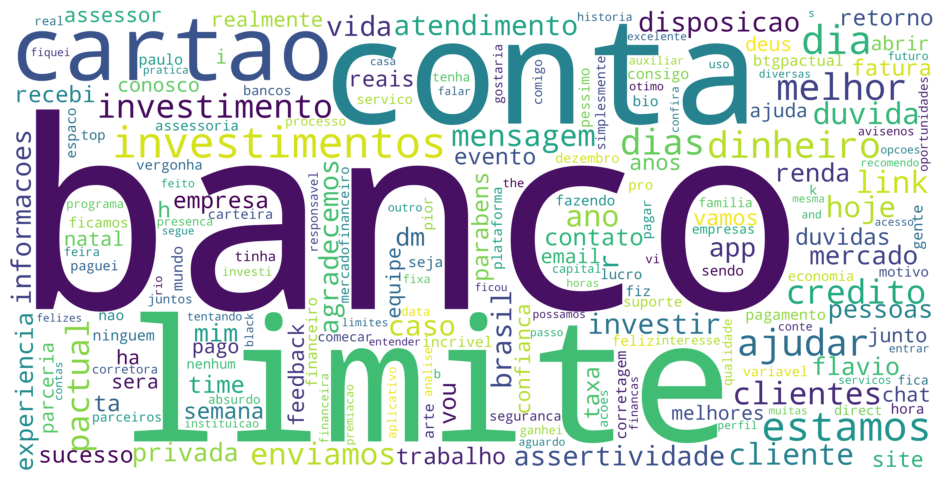

In [ ]:
gerarNuvemPalavras((pipeline_bow(df['texto']))[0], a)